In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from IPython.display import display
IPythonConsole.ipython_useSVG=True
IPythonConsole.drawOptions.addStereoAnnotation = True
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

## Find 5-membered heterocycles

In [2]:
def is_five_membered_heterocyclic(smiles):
    '''Filter out 5-membered heterocycles'''
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return False  # Invalid SMILES
    
    # Get ring information
    ring_info = mol.GetRingInfo()
    
    # Check each ring for size and heteroatoms
    for ring in ring_info.AtomRings():
        if len(ring) == 5:  # Check if the ring has 5 atoms
            # Check for heteroatoms in the ring
            heteroatoms = [atom for atom in ring if mol.GetAtomWithIdx(atom).GetSymbol() not in ['C', 'H']]
            if len(heteroatoms) > 0:
                return True  # Found a 5-mem heterocycle
    
    return False  # Not found a 5-mem heterocycle

## Load your results from classification model

In [3]:
df=pd.read_csv('./results_true_pred_smiles.csv')
df_smiles=df["smiles"]

In [4]:
# Filter for 5-membered heterocycles, boolean mask used to filter rows
df['is_heterocycle'] = df['smiles'].apply(is_five_membered_heterocyclic)
df_heterocycles = df[df['is_heterocycle']]

df_heterocycles_filtered = df_heterocycles[['y_true', 'y_pred_prob', 'smiles']]
df_heterocycles_filtered.to_csv('heterocycles_5mem_171.csv', index=False)

# Save to an excel file with molecule image
df_heterocycles_filtered['Molecule'] = [Chem.MolFromSmiles(s) for s in df_heterocycles_filtered['smiles']]
PandasTools.SaveXlsxFromFrame(df_heterocycles_filtered, 'heterocycles_5mem_171.xlsx', molCol='Molecule', size=(300, 300))

# Optionally, drop the 'is_heterocycle' column if not needed
df_heterocycles_filtered.reset_index(drop=True, inplace=True)

## Display all 5-membered heterocycles

y_true  y_pred_prob  \
0       1.0       0.9999   
1       0.0       0.1189   
2       1.0       0.9827   
3       0.0       0.3447   
4       1.0       0.9757   
5       1.0       0.9849   
6       0.0       0.0128   
7       1.0       0.9964   
8       1.0       0.9678   
9       1.0       0.9673   
10      0.0       0.5548   
11      1.0       0.9631   
12      1.0       0.9950   
13      1.0       0.8510   
14      1.0       0.9348   
15      1.0       0.9411   
16      1.0       0.8212   
17      1.0       0.8290   
18      1.0       0.2504   
19      1.0       0.4708   
20      0.0       0.2409   
21      1.0       0.9999   
22      1.0       0.9977   
23      1.0       0.8252   
24      1.0       0.9990   
25      1.0       0.9959   
26      1.0       0.9468   
27      1.0       0.9860   
28      0.0       0.1932   
29      1.0       0.9395   
30      1.0       0.9671   
31      1.0       0.9717   
32      1.0       0.5195   
33      1.0       0.9264   
34      1.0       0.9794   
35      1.0       0.1868   
36      0.0       0.3839   
37      1.0       0.9620   
38      1.0       0.9988   
39      1.0       0.9358   
40      1.0       0.7634   
41      1.0       0.7281   
42      0.0       0.1622   
43      1.0       0.5031   
44      1.0       0.9466   
45      1.0       0.9930   
46      0.0       0.4110   
47      1.0       0.6410   
48      0.0       0.9544   
49      1.0       0.9998   
50      1.0       0.9976   
51      1.0       0.9997   
52      1.0       0.9975   
53      1.0       0.9999   
54      1.0       0.9981   
55      1.0       0.4720   
56      1.0       0.6997   
57      1.0       0.9034   
58      1.0       0.9462   
59      1.0       0.5343   
60      1.0       0.9856   
61      1.0       0.8315   
62      1.0       0.4181   
63      1.0       0.7208   
64      1.0       0.7921   
65      1.0       0.0172   
66      0.0       0.2570   
67      1.0       0.4446   
68      1.0       0.7501   
69      0.0       0.2511   
70      1.0       0.8650   
71      1.0       0.8471   
72      1.0       0.8822   
73      1.0       0.9993   
74      1.0       0.9982   
75      1.0       0.9899   
76      1.0       0.9922   
77      1.0       0.9913   
78      1.0       0.9894   
79      1.0       0.9985   
80      1.0       0.9988   
81      1.0       0.9991   
82      1.0       0.9176   
83      1.0       0.9949   
84      1.0       0.9950   
85      1.0       0.9983   
86      1.0       0.9974   
87      1.0       0.9601   
88      1.0       0.9145   
89      1.0       0.7011   
90      1.0       0.9991   
91      1.0       0.9620   
92      1.0       0.9777   
93      0.0       0.7055   
94      1.0       0.9903   
95      1.0       0.9749   
96      0.0       0.9688   
97      1.0       0.9852   
98      1.0       0.9882   
99      1.0       0.9909   
100     1.0       0.9650   
101     1.0       0.8944   
102     1.0       0.9861   
103     1.0       0.9751   
104     1.0       0.9070   
105     0.0       0.0067   
106     1.0       0.9861   
107     1.0       0.9545   
108     1.0       0.9659   
109     0.0       0.1602   
110     1.0       0.9177   
111     1.0       0.9238   
112     1.0       0.7445   
113     1.0       0.9996   
114     1.0       0.9588   
115     1.0       0.9513   
116     0.0       0.5917   
117     0.0       0.2003   
118     0.0       0.8808   
119     0.0       0.1004   
120     1.0       0.9964   
121     0.0       0.1793   
122     1.0       0.9713   
123     1.0       0.9995   
124     1.0       0.9989   
125     1.0       0.9997   
126     0.0       0.4843   
127     1.0       0.9611   
128     1.0       0.9460   
129     1.0       0.9894   
130     1.0       0.9429   
131     1.0       0.9720   
132     1.0       0.9958   
133     1.0       0.8288   
134     1.0       0.9177   
135     1.0       0.9988   
136     1.0       0.9987   
137     1.0       0.9928   
138     1.0       0.9988   
139     1.0       0.9680   
140     1.0       0.9731   
141     0.0       0.9703   
1
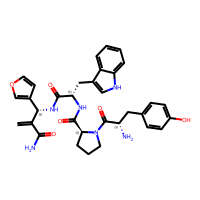
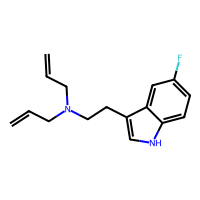
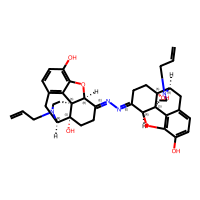
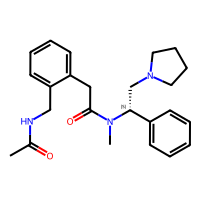
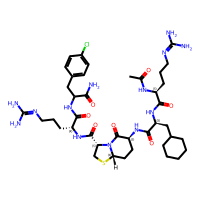
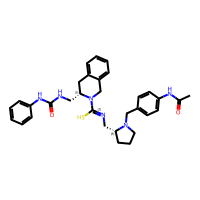
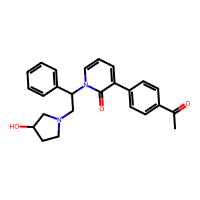
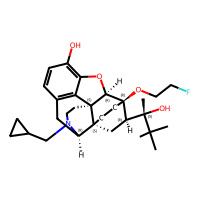
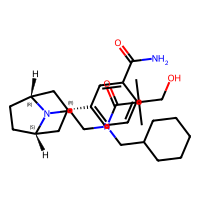
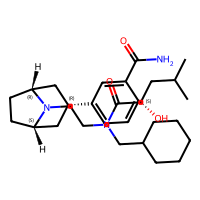
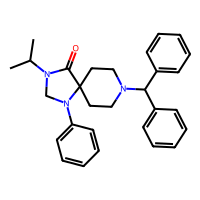
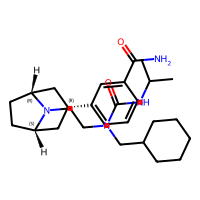
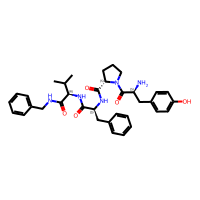
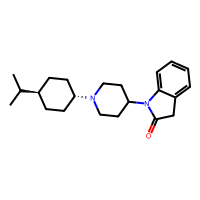
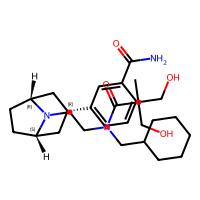
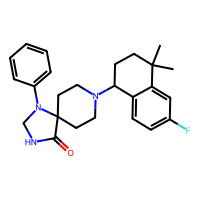
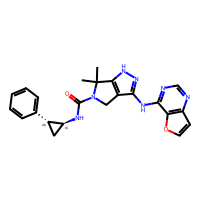
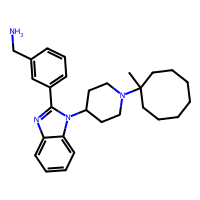
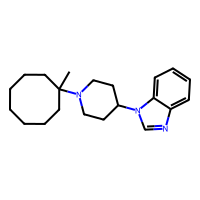
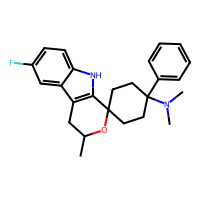
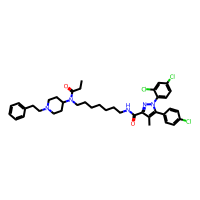
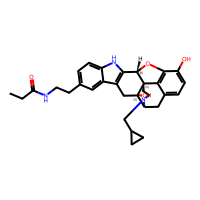
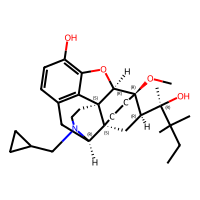
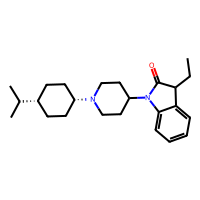
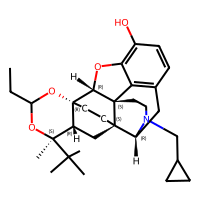
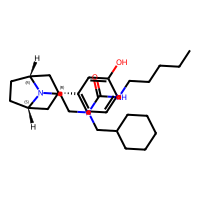
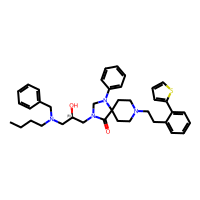
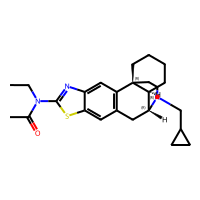
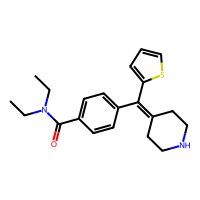
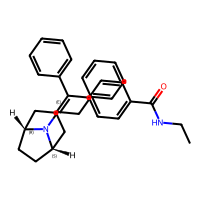
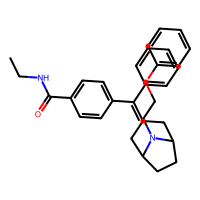
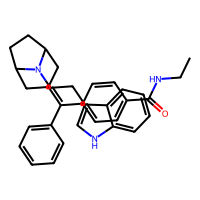
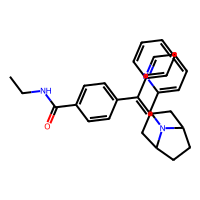
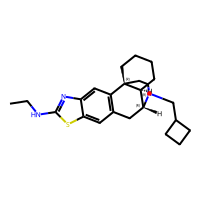
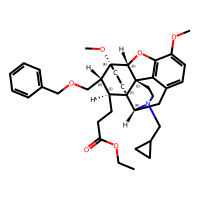
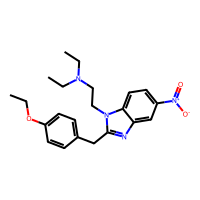
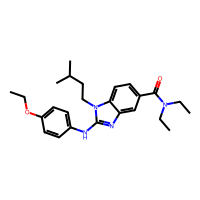
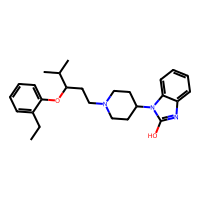
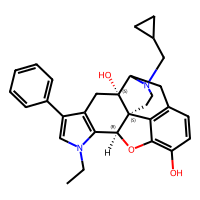
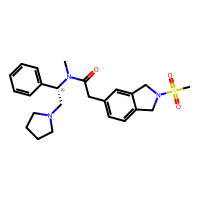
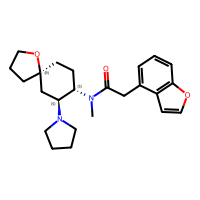
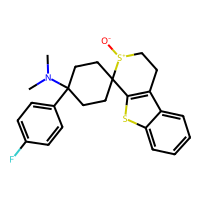
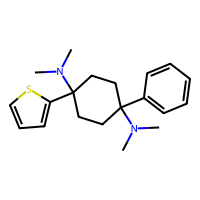
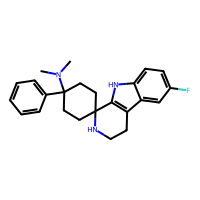
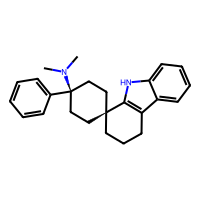
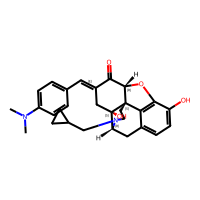
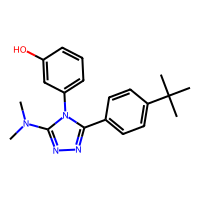
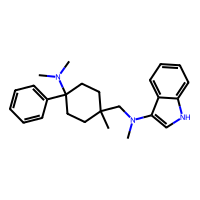
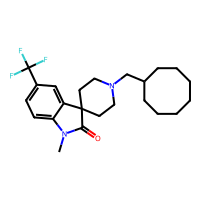
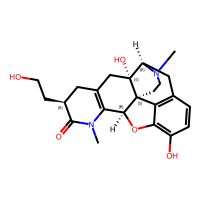
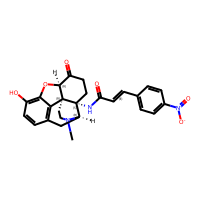
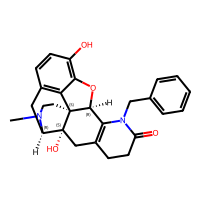
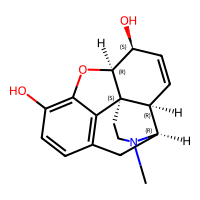
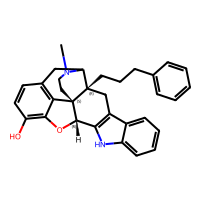
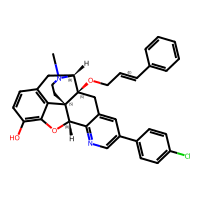
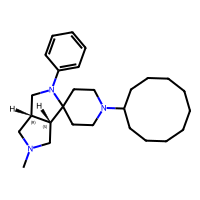
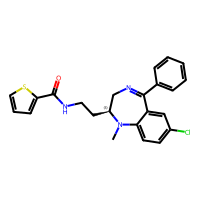
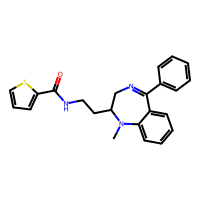
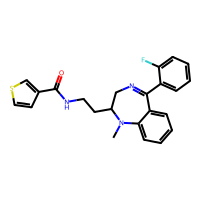
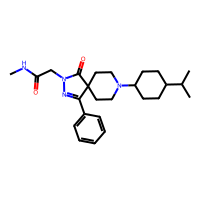
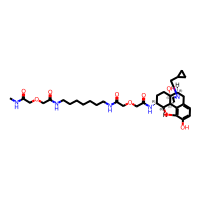
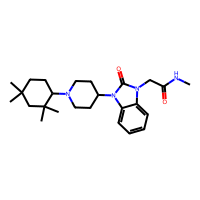
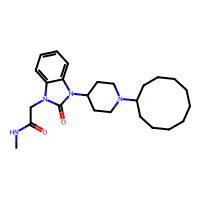
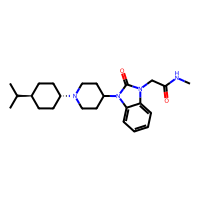
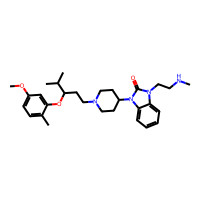
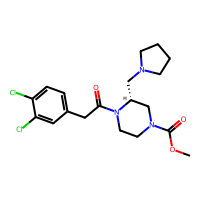
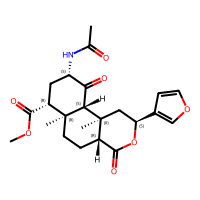
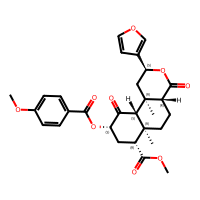
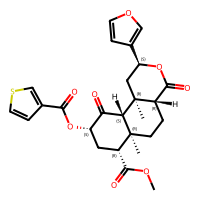
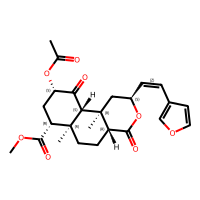
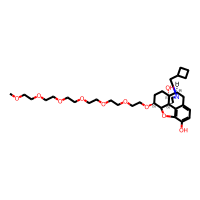
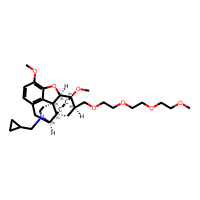
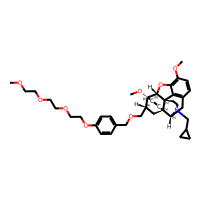
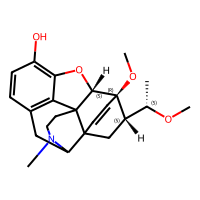
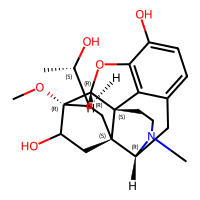
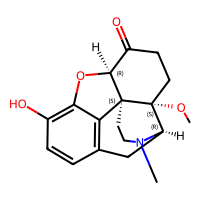
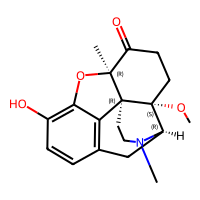
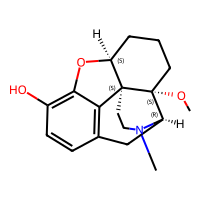
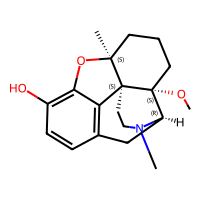
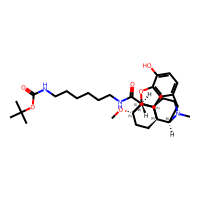
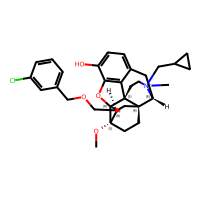
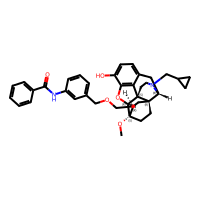
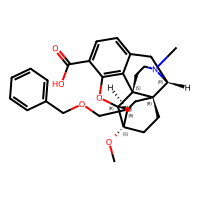
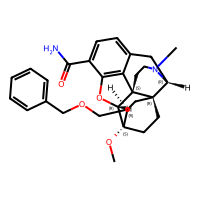
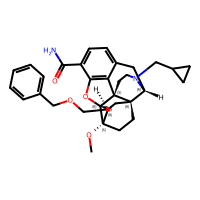
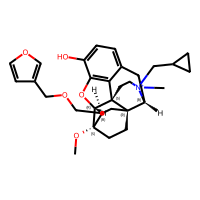
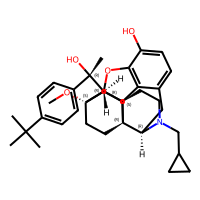
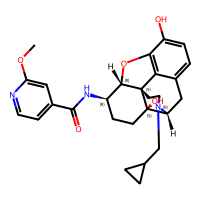
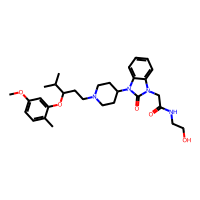
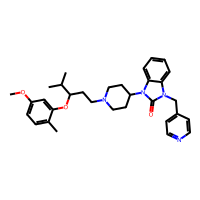
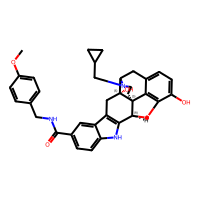
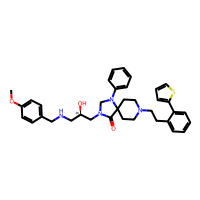
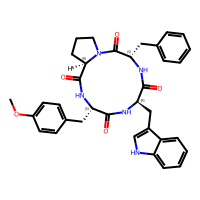
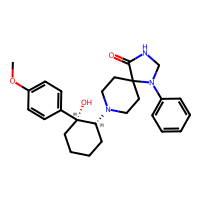
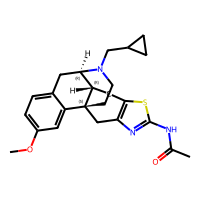
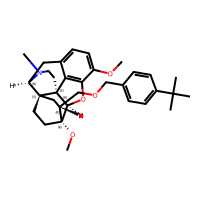
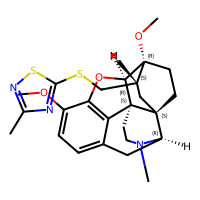
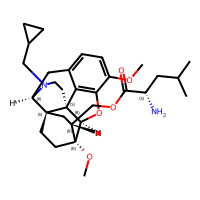
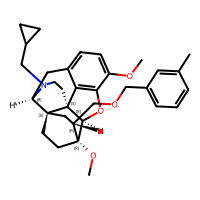
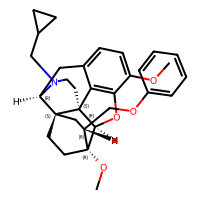
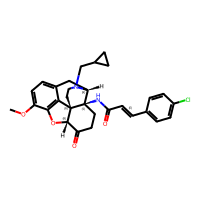
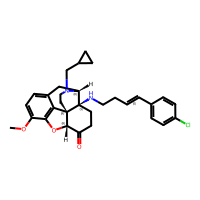
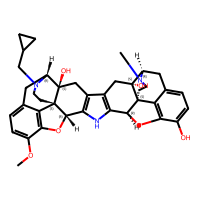
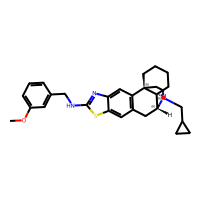
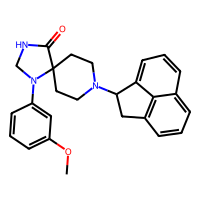
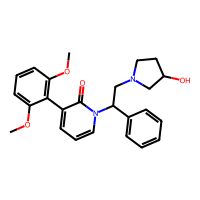
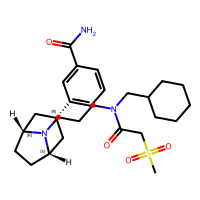
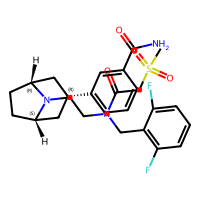
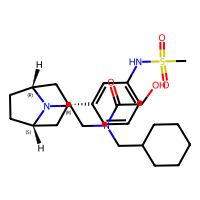
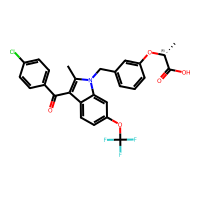
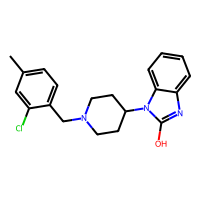
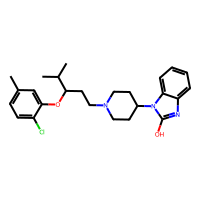
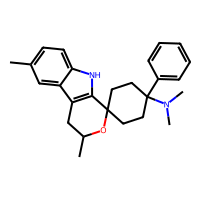
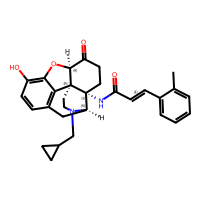
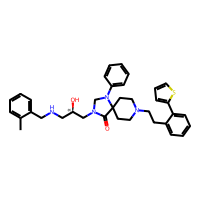
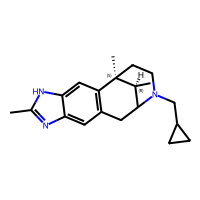
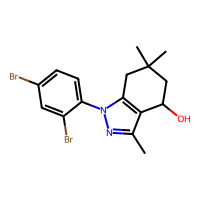
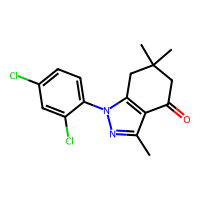
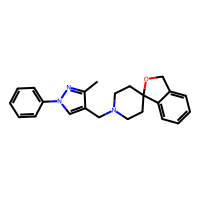
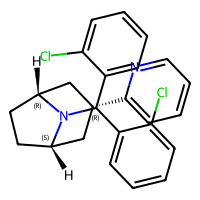
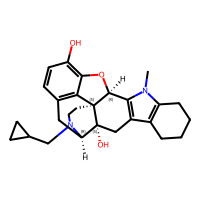
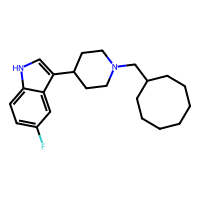
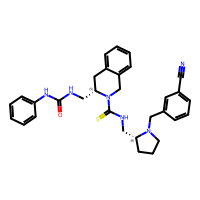
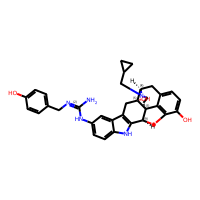
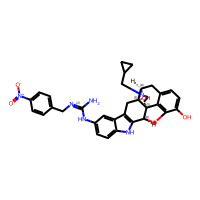
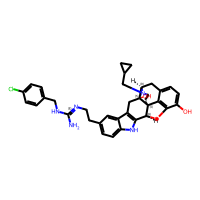
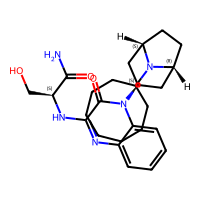
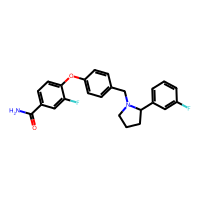
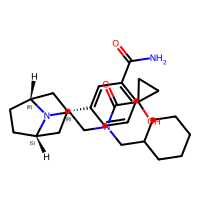
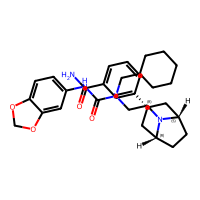
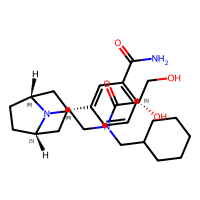
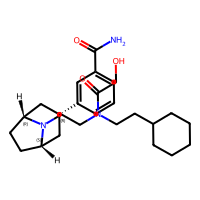
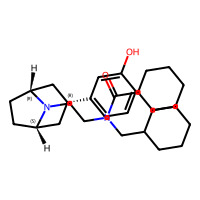
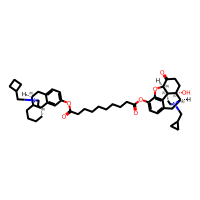
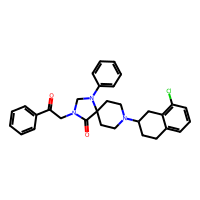
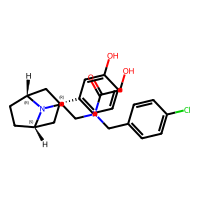
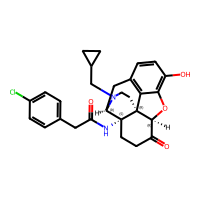
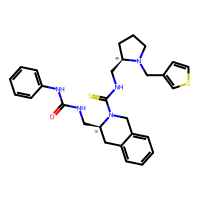
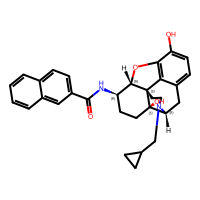
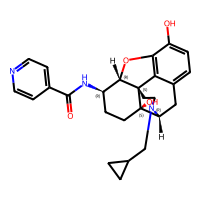
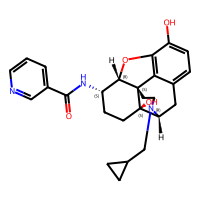
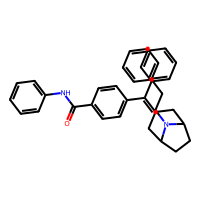
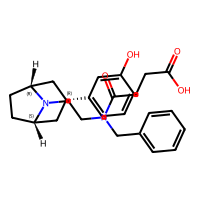
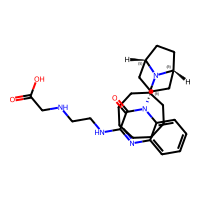
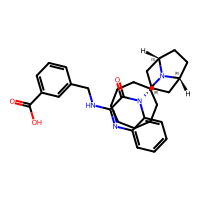
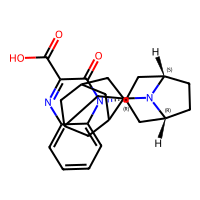
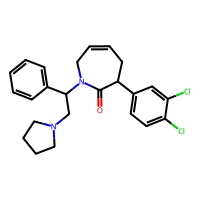
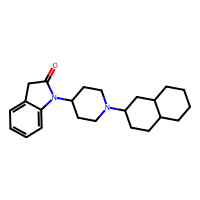
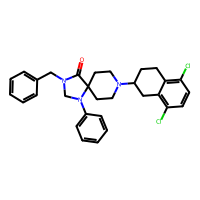
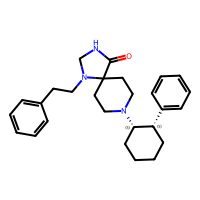
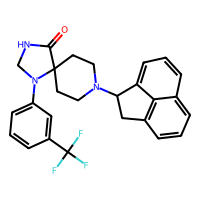
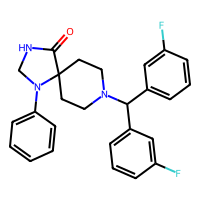
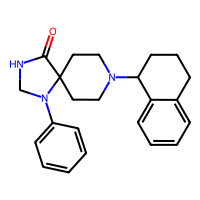
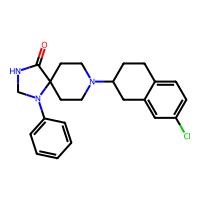
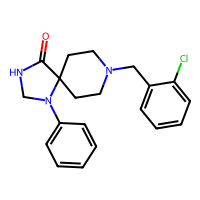
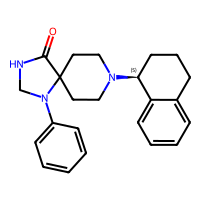
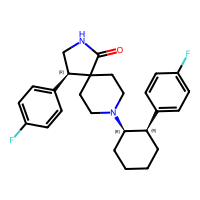
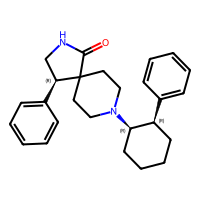
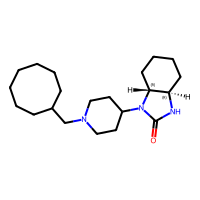
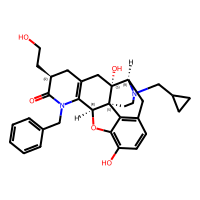
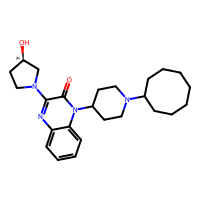
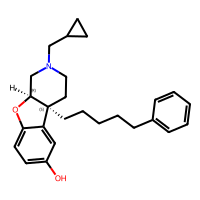
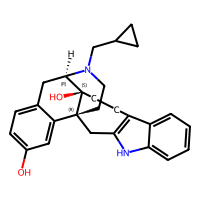
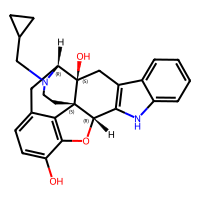
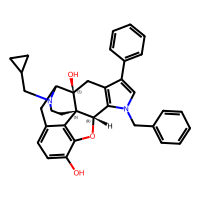
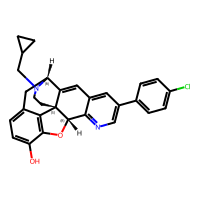
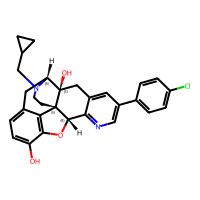
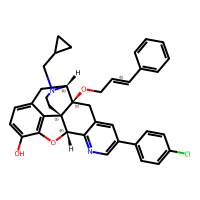
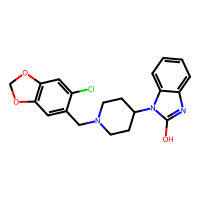
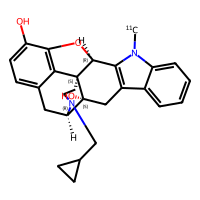
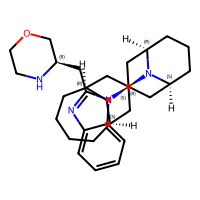

In [5]:
PandasTools.AddMoleculeColumnToFrame(df_heterocycles_filtered, smilesCol='smiles', molCol='Molecule')
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
df_heterocycles_filtered

## Load all sorted 5-membered heterocycles

y_true  y_pred_prob  \
0       0.0       0.0061   
1       0.0       0.0067   
2       0.0       0.0128   
3       0.0       0.0141   
4       0.0       0.0360   
5       0.0       0.0508   
6       0.0       0.0893   
7       0.0       0.1004   
8       0.0       0.1189   
9       0.0       0.1602   
10      0.0       0.1622   
11      0.0       0.1793   
12      0.0       0.1932   
13      0.0       0.2003   
14      0.0       0.2070   
15      0.0       0.2409   
16      0.0       0.2511   
17      0.0       0.2570   
18      0.0       0.3235   
19      0.0       0.3447   
20      0.0       0.3839   
21      0.0       0.4110   
22      0.0       0.4843   
23      0.0       0.4888   
24      0.0       0.5470   
25      0.0       0.5548   
26      0.0       0.5917   
27      0.0       0.6177   
28      0.0       0.6591   
29      0.0       0.7055   
30      0.0       0.8808   
31      0.0       0.9544   
32      0.0       0.9688   
33      0.0       0.9703   
34      1.0       0.0172   
35      1.0       0.1868   
36      1.0       0.2504   
37      1.0       0.4181   
38      1.0       0.4446   
39      1.0       0.4708   
40      1.0       0.4720   
41      1.0       0.5031   
42      1.0       0.5195   
43      1.0       0.5343   
44      1.0       0.5814   
45      1.0       0.6410   
46      1.0       0.6997   
47      1.0       0.7011   
48      1.0       0.7208   
49      1.0       0.7281   
50      1.0       0.7445   
51      1.0       0.7501   
52      1.0       0.7634   
53      1.0       0.7921   
54      1.0       0.8212   
55      1.0       0.8252   
56      1.0       0.8288   
57      1.0       0.8290   
58      1.0       0.8315   
59      1.0       0.8471   
60      1.0       0.8510   
61      1.0       0.8650   
62      1.0       0.8822   
63      1.0       0.8944   
64      1.0       0.9021   
65      1.0       0.9034   
66      1.0       0.9070   
67      1.0       0.9145   
68      1.0       0.9176   
69      1.0       0.9177   
70      1.0       0.9177   
71      1.0       0.9238   
72      1.0       0.9264   
73      1.0       0.9348   
74      1.0       0.9354   
75      1.0       0.9358   
76      1.0       0.9395   
77      1.0       0.9411   
78      1.0       0.9429   
79      1.0       0.9460   
80      1.0       0.9462   
81      1.0       0.9466   
82      1.0       0.9468   
83      1.0       0.9473   
84      1.0       0.9473   
85      1.0       0.9485   
86      1.0       0.9513   
87      1.0       0.9545   
88      1.0       0.9588   
89      1.0       0.9601   
90      1.0       0.9611   
91      1.0       0.9613   
92      1.0       0.9614   
93      1.0       0.9620   
94      1.0       0.9620   
95      1.0       0.9631   
96      1.0       0.9650   
97      1.0       0.9659   
98      1.0       0.9671   
99      1.0       0.9673   
100     1.0       0.9678   
101     1.0       0.9680   
102     1.0       0.9713   
103     1.0       0.9717   
104     1.0       0.9720   
105     1.0       0.9731   
106     1.0       0.9749   
107     1.0       0.9751   
108     1.0       0.9757   
109     1.0       0.9777   
110     1.0       0.9794   
111     1.0       0.9827   
112     1.0       0.9849   
113     1.0       0.9852   
114     1.0       0.9856   
115     1.0       0.9860   
116     1.0       0.9861   
117     1.0       0.9861   
118     1.0       0.9882   
119     1.0       0.9894   
120     1.0       0.9894   
121     1.0       0.9899   
122     1.0       0.9903   
123     1.0       0.9904   
124     1.0       0.9909   
125     1.0       0.9913   
126     1.0       0.9922   
127     1.0       0.9928   
128     1.0       0.9929   
129     1.0       0.9930   
130     1.0       0.9949   
131     1.0       0.9950   
132     1.0       0.9950   
133     1.0       0.9954   
134     1.0       0.9958   
135     1.0       0.9959   
136     1.0       0.9964   
137     1.0       0.9964   
138     1.0       0.9966   
139     1.0       0.9974   
140     1.0       0.9975   
141     1.0       0.9976   
1
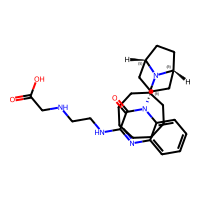
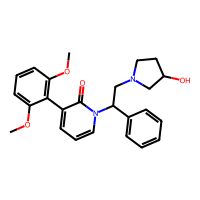
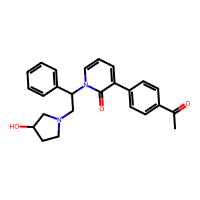
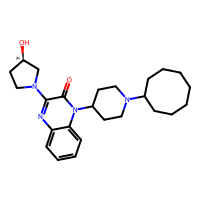
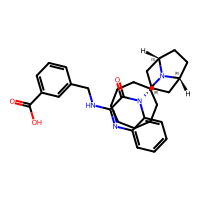
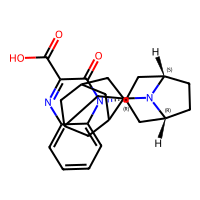
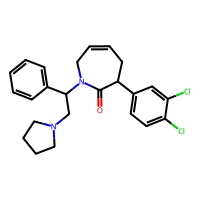
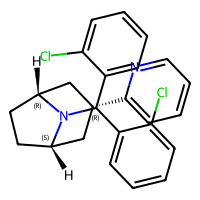
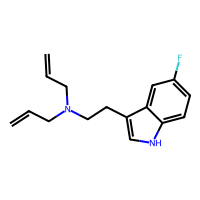
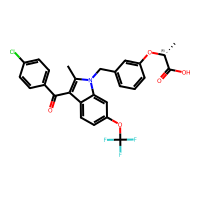
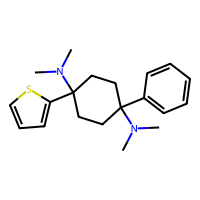
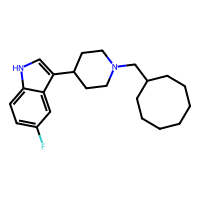
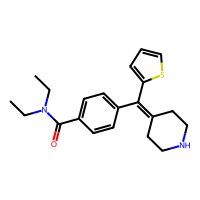
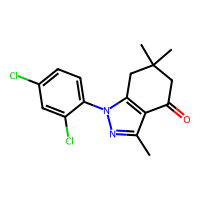
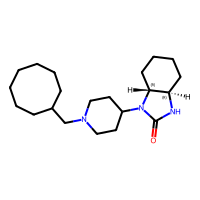
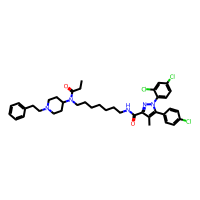
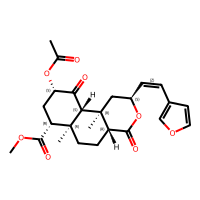
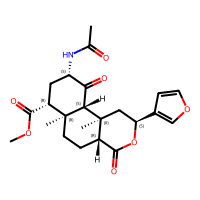
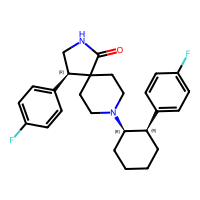
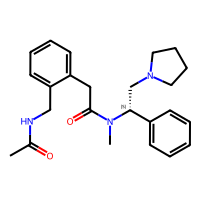
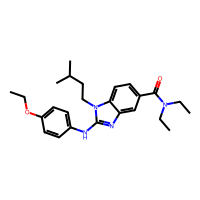
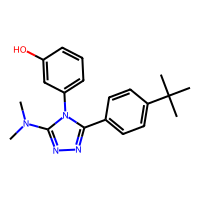
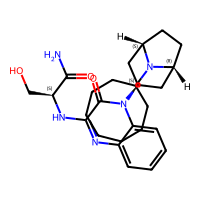
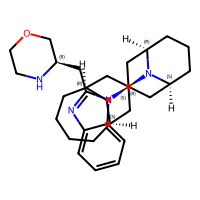
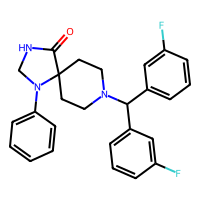
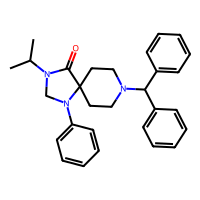
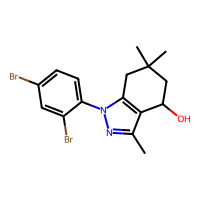
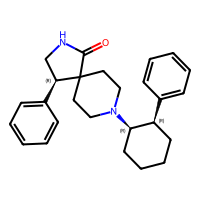
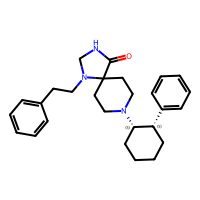
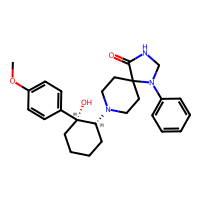
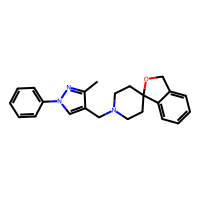
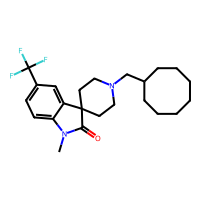
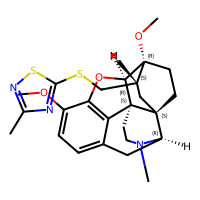
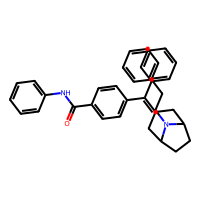
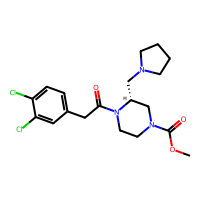
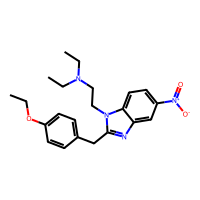
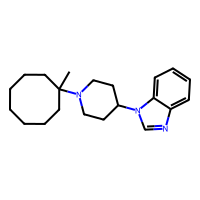
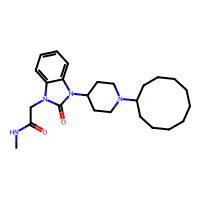
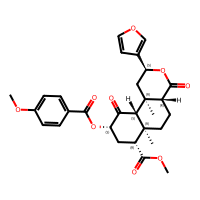
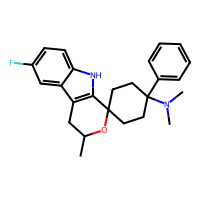
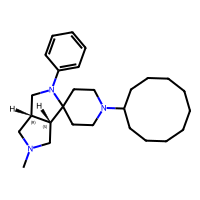
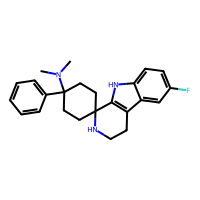
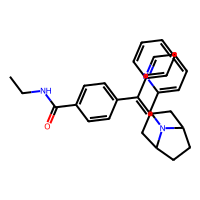
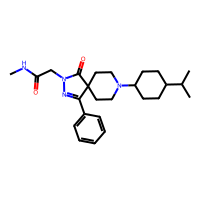
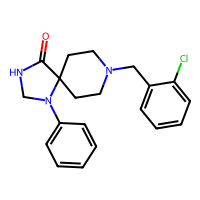
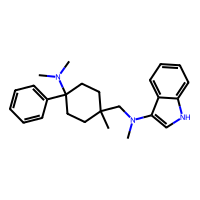
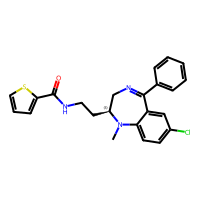
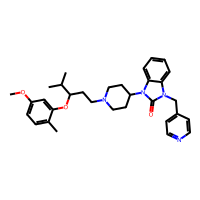
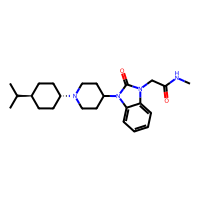
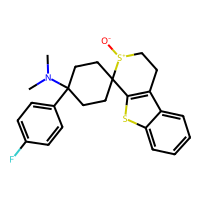
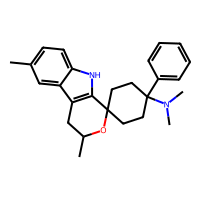
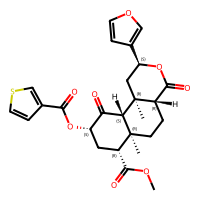
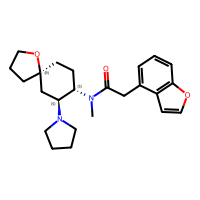
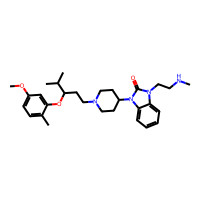
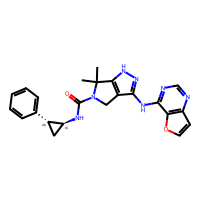
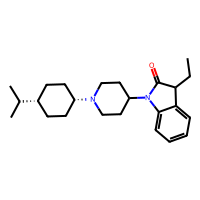
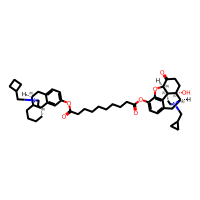
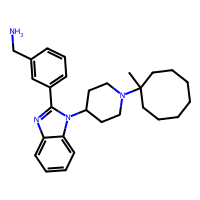
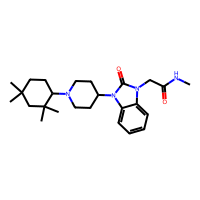
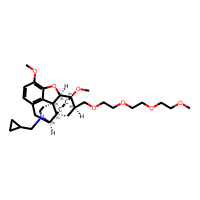
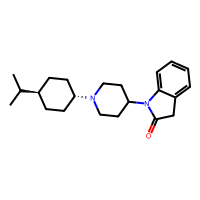
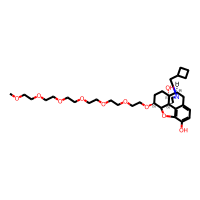
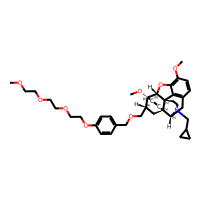
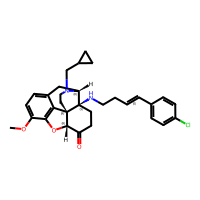
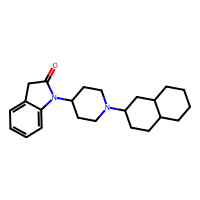
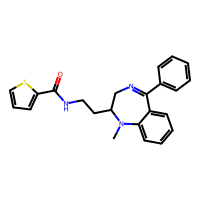
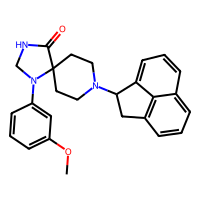
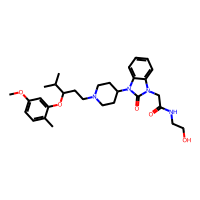
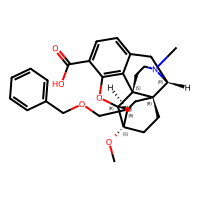
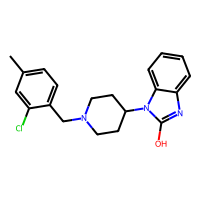
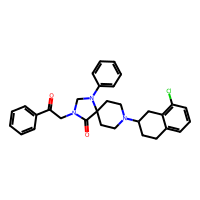
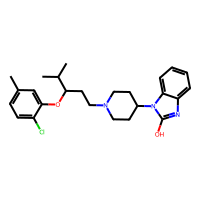
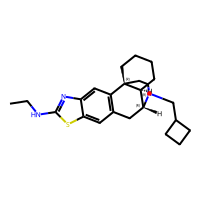
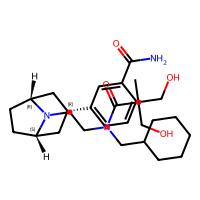
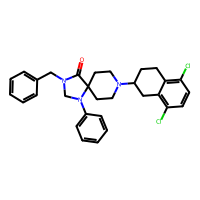
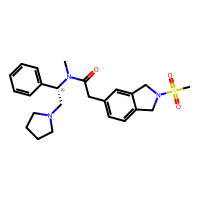
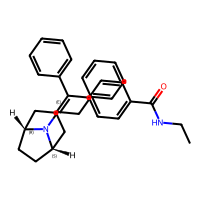
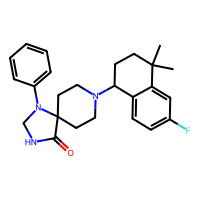
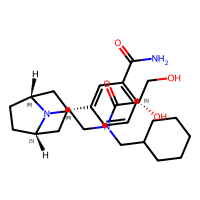
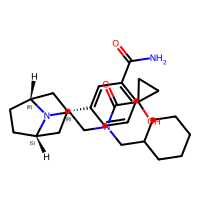
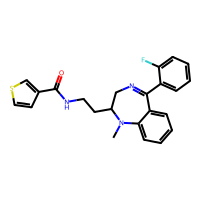
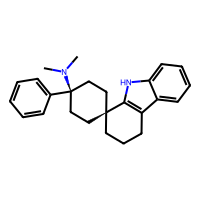
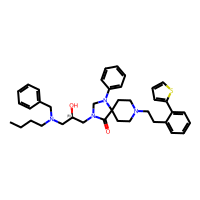
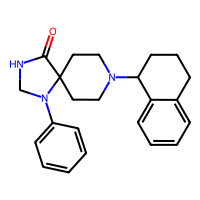
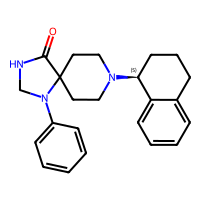
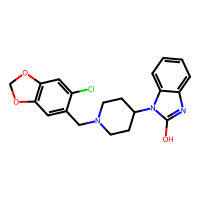
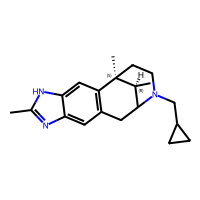
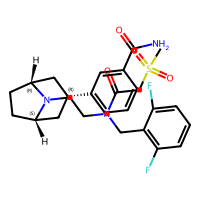
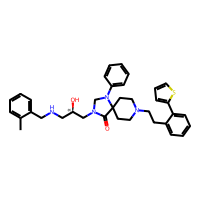
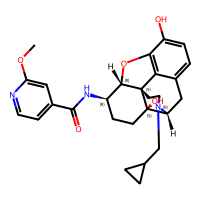
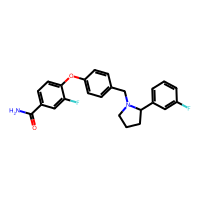
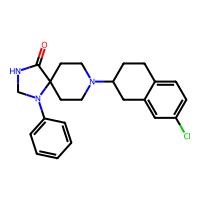
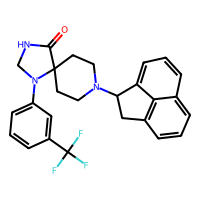
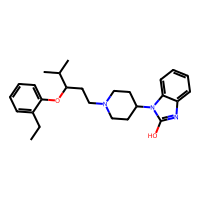
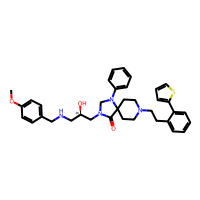
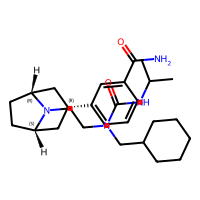
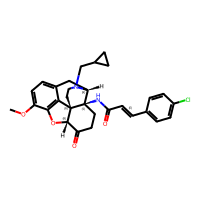
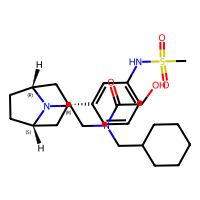
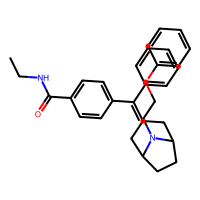
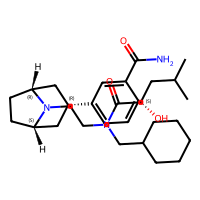
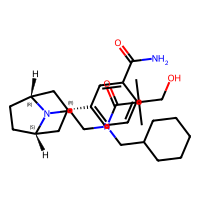
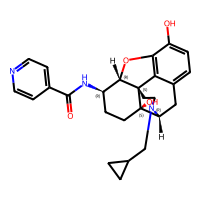
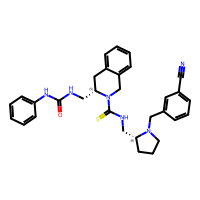
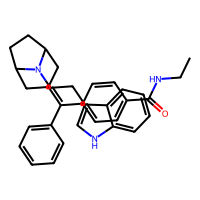
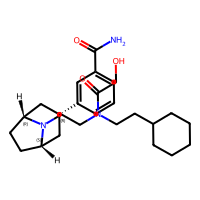
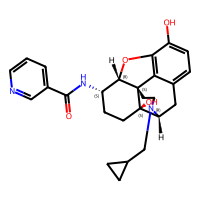
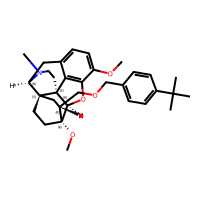
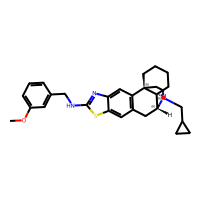
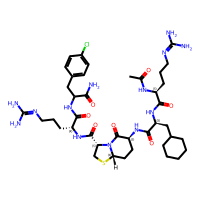
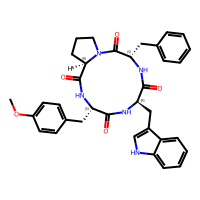
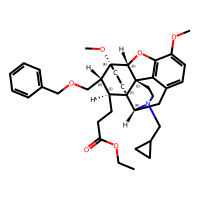
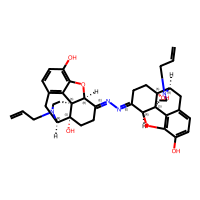
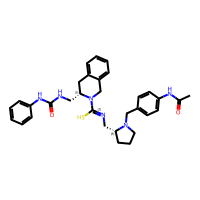
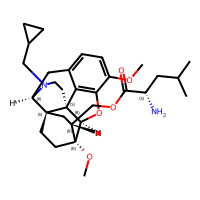
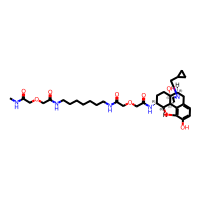
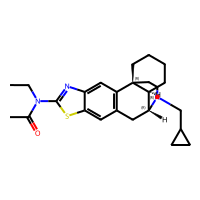
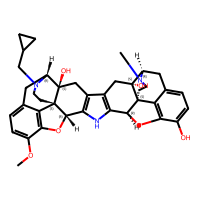
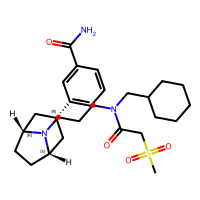
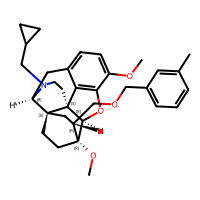
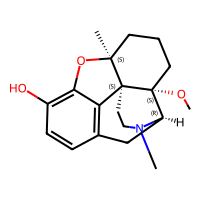
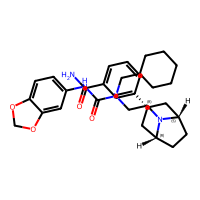
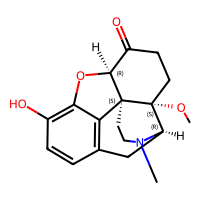
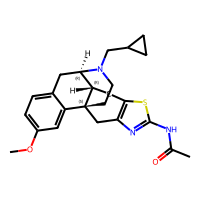
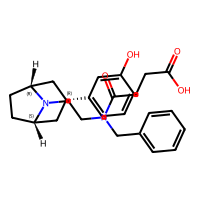
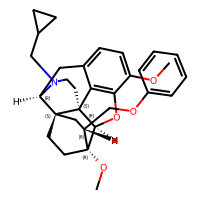
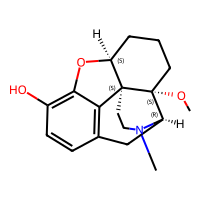
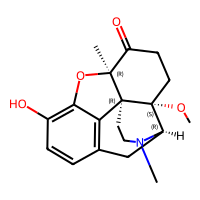
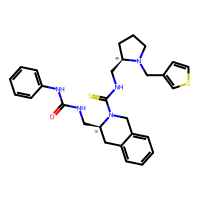
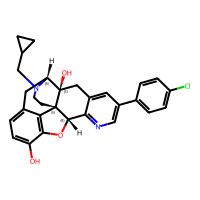
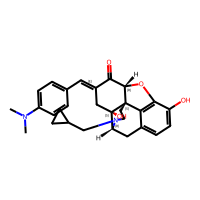
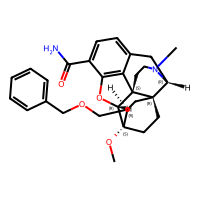
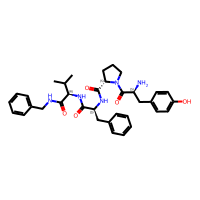
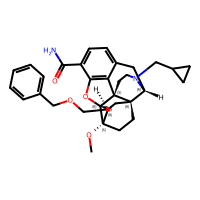
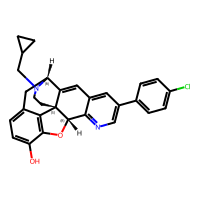
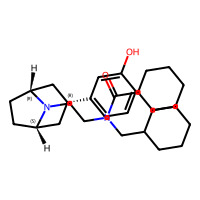
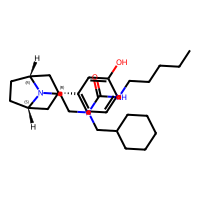
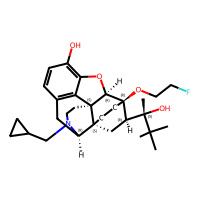
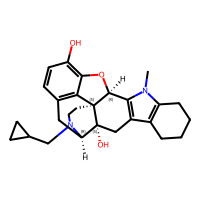
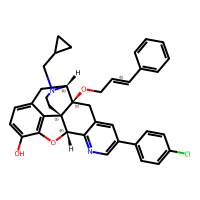
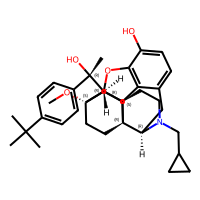
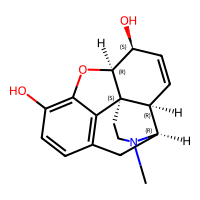
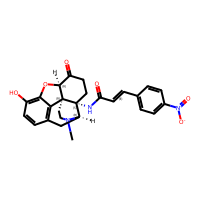
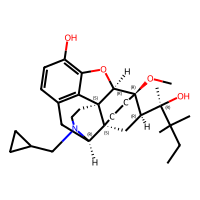
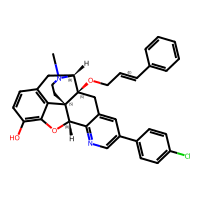
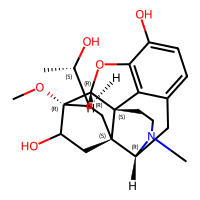
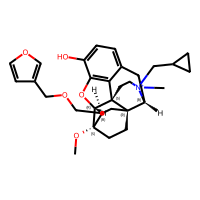
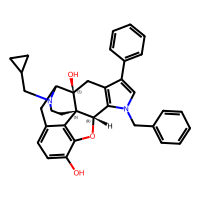
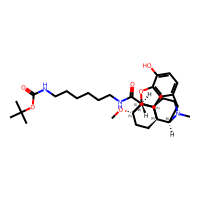
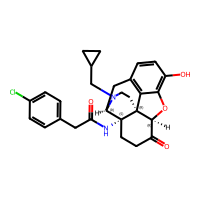
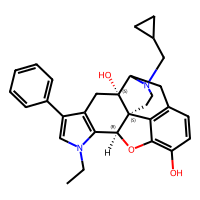
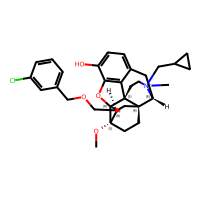
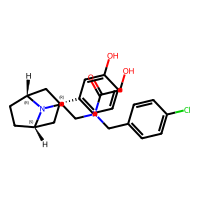
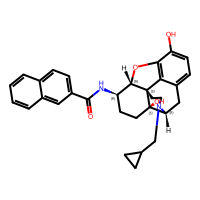
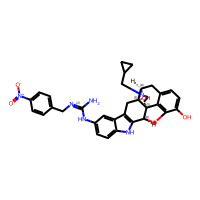
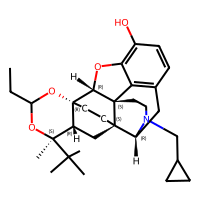
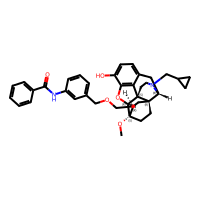
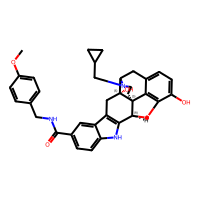
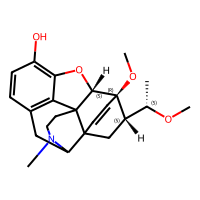
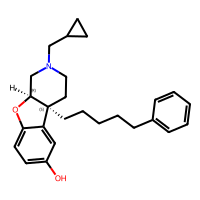
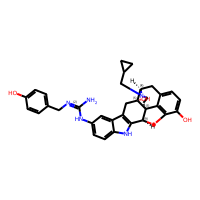
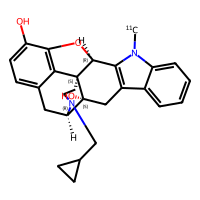
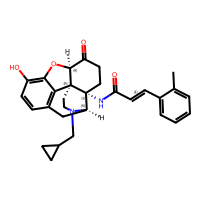
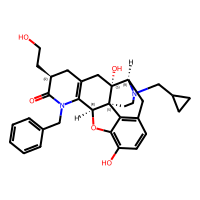
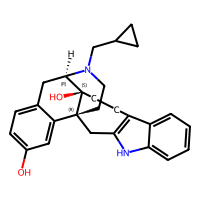
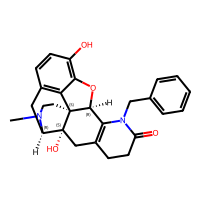
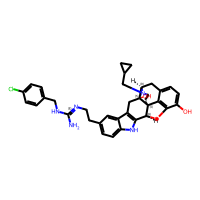
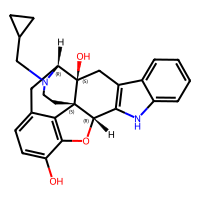
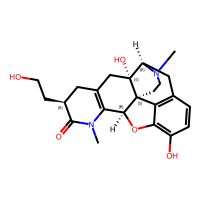
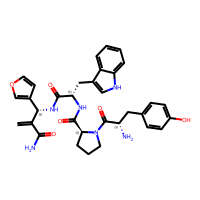
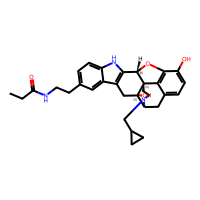
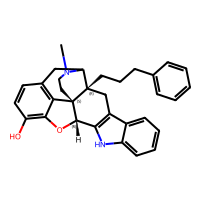

In [7]:
df_heterocycles_filtered_sorted=pd.read_csv('./heterocycles_5mem_171_sorted.csv')
PandasTools.AddMoleculeColumnToFrame(df_heterocycles_filtered_sorted, smilesCol='smiles', molCol='Molecule')
df_heterocycles_filtered_sorted

## Display misclassified 5-membered heterocycles

No. of misclassified samples: 18


y_true  y_pred_prob  \
24     0.0       0.5470   
25     0.0       0.5548   
26     0.0       0.5917   
27     0.0       0.6177   
28     0.0       0.6591   
29     0.0       0.7055   
30     0.0       0.8808   
31     0.0       0.9544   
32     0.0       0.9688   
33     0.0       0.9703   
34     1.0       0.0172   
35     1.0       0.1868   
36     1.0       0.2504   
37     1.0       0.4181   
38     1.0       0.4446   
39     1.0       0.4708   
40     1.0       0.4720   
41     1.0       0.5031   

                                                                                              smiles  \
24                                             O=C1NCN(c2ccccc2)C12CCN(C(c1cccc(F)c1)c1cccc(F)c1)CC2   
25                                            CC(C)N1CN(c2ccccc2)C2(CCN(C(c3ccccc3)c3ccccc3)CC2)C1=O   
26                                                          Cc1nn(-c2ccc(Br)cc2Br)c2c1C(O)CC(C)(C)C2   
27                                        O=C1NC[C@H](c2ccccc2)C12CCN([C@@H]1CCCC[C@@H]1c1ccccc1)CC2   
28                                            O=C1NCN(CCc2ccccc2)C12CCN([C@H]1CCCC[C@H]1c1ccccc1)CC2   
29                                        COc1ccc([C@]2(O)CCCC[C@H]2N2CCC3(CC2)C(=O)NCN3c2ccccc2)cc1   
30                                                        Cc1nn(-c2ccccc2)cc1CN1CCC2(CC1)OCc1ccccc12   
31                                                CN1C(=O)C2(CCN(CC3CCCCCCC3)CC2)c2cc(C(F)(F)F)ccc21   
32                 COc1ccc2c3c1O[C@@H]1[C@]34CCN(C)[C@H](C2)[C@]42CC[C@@]1(OC)[C@@H](CSc1nc(C)ns1)C2   
33                                      O=C(Nc1ccccc1)c1ccc(C(=C2CC3CCC(C2)N3CCc2ccccc2)c2ccccc2)cc1   
34                                             COC(=O)N1CCN(C(=O)Cc2ccc(Cl)c(Cl)c2)[C@H](CN2CCCC2)C1   
35                                                CCOc1ccc(Cc2nc3cc([N+](=O)[O-])ccc3n2CCN(CC)CC)cc1   
36                                                              CC1(N2CCC(n3cnc4ccccc43)CC2)CCCCCCC1   
37                                                 CNC(=O)Cn1c(=O)n(C2CCN(C3CCCCCCCCC3)CC2)c2ccccc21   
38  COC(=O)[C@@H]1C[C@H](OC(=O)c2ccc(OC)cc2)C(=O)[C@H]2[C@@]1(C)CC[C@H]1C(=O)O[C@H](c3ccoc3)C[C@]21C   
39                                            CC1Cc2c([nH]c3ccc(F)cc23)C2(CCC(c3ccccc3)(N(C)C)CC2)O1   
40                                           CN1C[C@@H]2[C@H](C1)CN(c1ccccc1)C21CCN(C2CCCCCCCCC2)CC1   
41                                                 CN(C)C1(c2ccccc2)CCC2(CC1)NCCc1c2[nH]c2ccc(F)cc12   

                                         Molecule  
24  <rdkit.Chem.rdchem.Mol object at 0x1334a9f50>  
25  <rdkit.Chem.rdchem.Mol object at 0x1334a91c0>  
26  <rdkit.Chem.rdchem.Mol object at 0x134dbab90>  
27  <rdkit.Chem.rdchem.Mol object at 0x134dbb300>  
28  <rdkit.Chem.rdchem.Mol object at 0x134dbb6f0>  
29  <rdkit.Chem.rdchem.Mol object at 0x134dbb0d0>  
30  <rdkit.Chem.rdchem.Mol object at 0x134dbb450>  
31  <rdkit.Chem.rdchem.Mol object at 0x134dbac70>  
32  <rdkit.Chem.rdchem.Mol object at 0x134dbac00>  
33  <rdkit.Chem.rdchem.Mol object at 0x134dbb8b0>  
34  <rdkit.Chem.rdchem.Mol object at 0x134dbb370>  
35  <rdkit.Chem.rdchem.Mol object at 0x134dbb3e0>  
36  <rdkit.Chem.rdchem.Mol object at 0x134dbb530>  
37  <rdkit.Chem.rdchem.Mol object at 0x134dbb5a0>  
38  <rdkit.Chem.rdchem.Mol object at 0x134dbaea0>  
39  <rdkit.Chem.rdchem.Mol object at 0x134dbb680>  
40  <rdkit.Chem.rdchem.Mol object at 0x134dbaf10>  
41  <rdkit.Chem.rdchem.Mol object at 0x134dbb060>
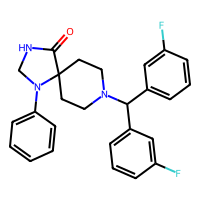
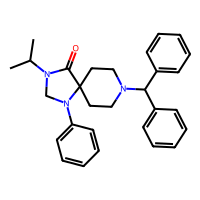
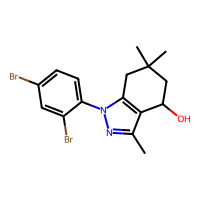
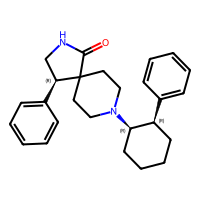
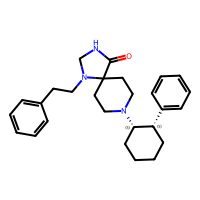
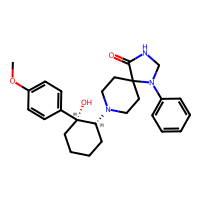
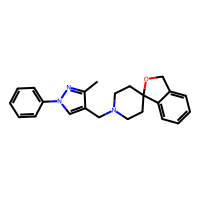
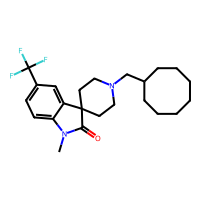
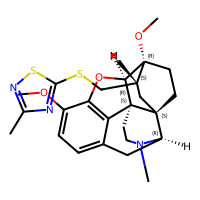
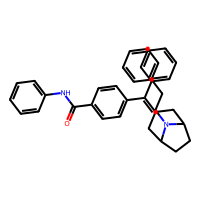
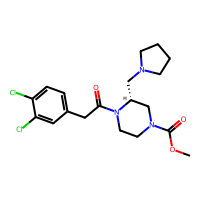
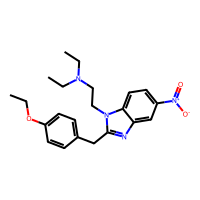
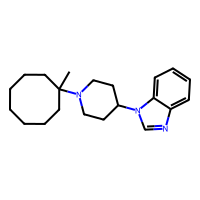
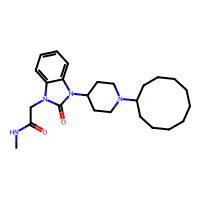
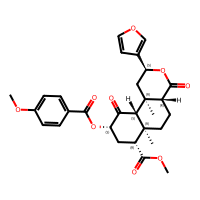
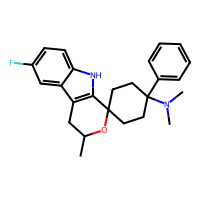
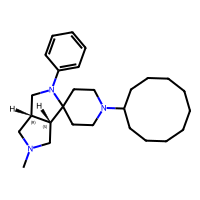
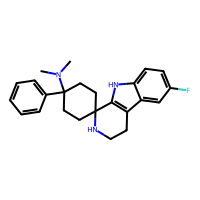

In [8]:
selected_indices = df_heterocycles_filtered_sorted.iloc[24:42].copy()
print(f"No. of misclassified samples: {len(selected_indices)}")

# Save to an excel file with molecule image
selected_indices['Molecule'] = [Chem.MolFromSmiles(s) for s in selected_indices['smiles']]
PandasTools.SaveXlsxFromFrame(selected_indices, 'heterocycles_5mem_missclassified.xlsx', molCol='Molecule', size=(300, 300))

PandasTools.AddMoleculeColumnToFrame(selected_indices, smilesCol='smiles', molCol='Molecule')
selected_indices

In [9]:
molxy = {
    'y_true' : [1,0],
    'y_pred_prob' : [0.7501,0.2511],
    'smiles': ['COC(=O)[C@@H]1C[C@H](OC(=O)c2ccsc2)C(=O)[C@H]2[C@@]1(C)CC[C@H]1C(=O)O[C@H](c3ccoc3)C[C@]21C',
               'COC(=O)[C@@H]1C[C@H](NC(C)=O)C(=O)[C@H]2[C@@]1(C)CC[C@H]1C(=O)O[C@H](c3ccoc3)C[C@]21C'
              ]}
molxy_df = pd.DataFrame(molxy)
molxy_df['Molecule'] = [Chem.MolFromSmiles(s) for s in molxy_df['smiles']]
PandasTools.SaveXlsxFromFrame(molxy_df, 'heterocycles_5mem_thiophene_vs_amide.xlsx', molCol='Molecule', size=(300, 300))

y_true  y_pred_prob  \
0       1       0.7501   
1       0       0.2511   

                                                                                        smiles  \
0  COC(=O)[C@@H]1C[C@H](OC(=O)c2ccsc2)C(=O)[C@H]2[C@@]1(C)CC[C@H]1C(=O)O[C@H](c3ccoc3)C[C@]21C   
1        COC(=O)[C@@H]1C[C@H](NC(C)=O)C(=O)[C@H]2[C@@]1(C)CC[C@H]1C(=O)O[C@H](c3ccoc3)C[C@]21C   

                                        Molecule  
0  <rdkit.Chem.rdchem.Mol object at 0x1352c7530>  
1  <rdkit.Chem.rdchem.Mol object at 0x1352c6ce0>
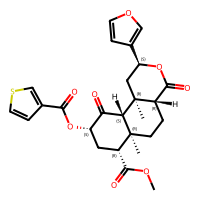
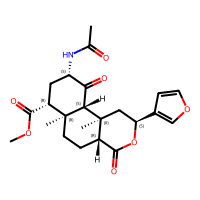

In [10]:
PandasTools.AddMoleculeColumnToFrame(molxy_df, smilesCol='smiles', molCol='Molecule')
display(molxy_df)

In [11]:
thiophehe_vs_amide_img=Draw.MolsToGridImage(molxy_df['Molecule'], molsPerRow=2, subImgSize=(500,500), useSVG=True)
thiophehe_vs_amide_svg = thiophehe_vs_amide_img.data
with open(f"./heterocycles_5mem_thiophene_vs_amide.svg", "w") as f:
    f.write(thiophehe_vs_amide_svg)

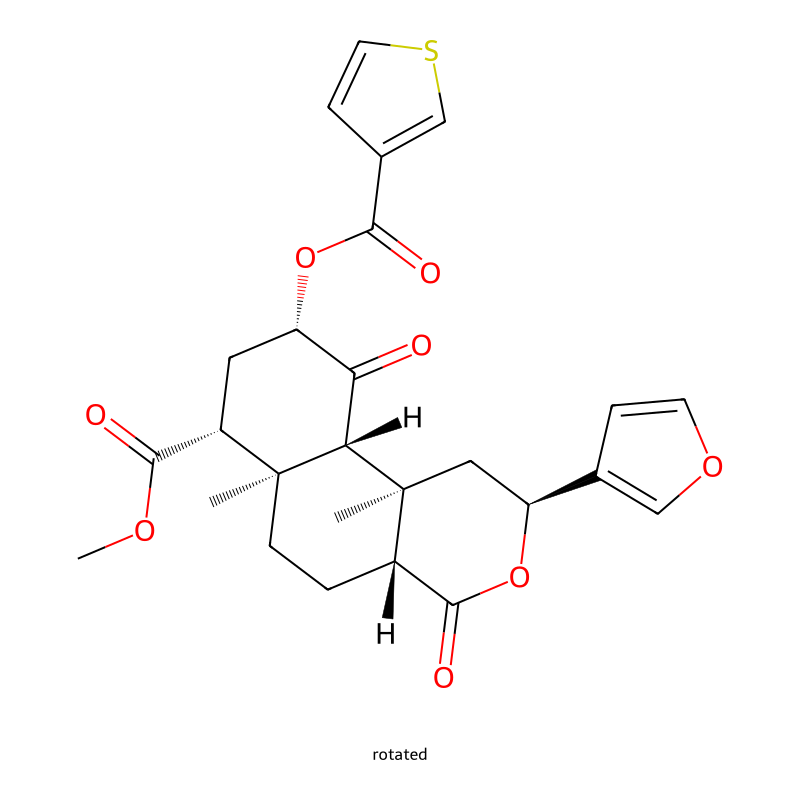

In [12]:
from PIL import Image
from io import BytesIO


def show_mol(d2d,mol,legend='',highlightAtoms=[]):
    d2d.DrawMolecule(mol,legend=legend, highlightAtoms=highlightAtoms)
    d2d.FinishDrawing()
    bio = BytesIO(d2d.GetDrawingText())
    return Image.open(bio)

def show_images(imgs,buffer=5):
    height = 0
    width = 0
    for img in imgs:
        height = max(height,img.height)
        width += img.width
    width += buffer*(len(imgs)-1)
    res = Image.new("RGBA",(width,height))
    x = 0
    for img in imgs:
        res.paste(img,(x,0))
        x += img.width + buffer
    return res

imgs = []
thio=molxy_df['Molecule'][0]
d2d = Draw.MolDraw2DCairo(800,800)
dopts = d2d.drawOptions()
dopts.rotate = 90
imgs.append(show_mol(d2d,thio,legend='rotated'))

show_images(imgs)

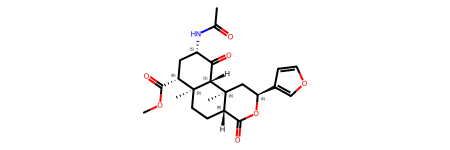

In [13]:
amide=molxy_df['Molecule'][1]
amide